In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install plotly-express

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import warnings
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import plotly.express as px

In [5]:
warnings.filterwarnings('ignore')
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

In [6]:
RawData = pandas.read_csv('C:/Users/vicen/Documents/GitHub/Vicente-Pinochet-Data-Portfolio/Informacion Paises Global 2023/world-data-2023.csv')
RawData.sample(10)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
23,Brazil,25,BR,33.90%,"8,515,770","730,000",13.92,55.0,Bras���,"462,299",167.4,3.70%,BRL,1.73,58.90%,$1.02,"$1,839,758,040,766",115.40%,51.30%,12.8,S����,75.7,60.0,$1.53,Portuguese,28.30%,2.15,"212,559,417",63.90%,14.20%,65.10%,12.08%,"183,241,641",-14.235004,-51.925280
160,Somalia,25,SO,70.30%,"637,657","20,000",41.75,252.0,Mogadishu,645,NaN,NaN,SOS,6.07,10.00%,$1.41,"$4,720,727,278",23.40%,2.50%,76.6,Bosaso,57.1,829.0,NaN,Arabic,NaN,0.02,"15,442,905",47.40%,0.00%,NaN,11.35%,"7,034,861",5.152149,46.199616
85,Japan,347,JP,12.30%,"377,944","261,000",7.40,81.0,Tokyo,"1,135,886",105.48,0.50%,NaN,1.42,68.50%,$1.06,"$5,081,769,542,380",98.80%,63.20%,1.8,Tokyo,84.2,5.0,$6.77,NaN,13.10%,2.41,"126,226,568",61.70%,11.90%,46.70%,2.29%,"115,782,416",36.204824,138.252924
38,Comoros,467,KM,71.50%,"2,235",NaN,31.88,269.0,"Moroni, Comoros",202,103.62,-4.30%,KMF,4.21,19.70%,NaN,"$1,185,728,677",99.50%,9.00%,51.3,"Moroni, Comoros",64.1,273.0,$0.71,French,74.80%,0.27,"850,886",43.30%,NaN,219.60%,4.34%,"248,152",-11.645500,43.333300
157,Slovakia,114,SK,39.20%,"49,035","16,000",10.60,421.0,Bratislava,"32,424",115.34,2.70%,EUR,1.52,40.40%,$1.32,"$105,422,304,976",98.70%,46.60%,4.6,Bratislava,77.2,5.0,$3.11,Slovak,18.40%,3.42,"5,454,073",59.50%,18.70%,49.70%,5.56%,"2,930,419",48.669026,19.699024
77,India,464,IN,60.40%,"3,287,263","3,031,000",17.86,91.0,New Delhi,"2,407,672",180.44,7.70%,INR,2.22,23.80%,$0.97,"$2,611,000,000,000",113.00%,28.10%,29.9,Kurebhar,69.4,145.0,$0.30,Hindi,65.10%,0.86,"1,366,417,754",49.30%,11.20%,49.70%,5.36%,"471,031,528",20.593684,78.962880
187,Uruguay,20,UY,82.60%,"176,215","22,000",13.86,598.0,Montevideo,"6,766",202.92,7.90%,UYU,1.97,10.70%,$1.50,"$56,045,912,952",108.50%,63.10%,6.4,Montevideo,77.8,17.0,$1.66,Spanish,16.20%,5.05,"3,461,734",64.00%,20.10%,41.80%,8.73%,"3,303,394",-32.522779,-55.765835
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
40,Costa Rica,100,CR,34.50%,"51,100","10,000",13.97,506.0,San Jos������,"8,023",128.85,2.10%,CRC,1.75,54.60%,$0.98,"$61,773,944,174",113.30%,55.20%,7.6,San Jos������,80.1,27.0,$1.84,Spanish,21.50%,2.89,"5,047,561",62.10%,13.60%,58.30%,11.85%,"4,041,885",9.748917,-83.753428
145,Saint Kitts and Nevis,205,KN,23.10%,261,NaN,12.60,1.0,Basseterre,238,104.57,-1.00%,XCD,2.11,42.30%,NaN,"$1,050,992,593",108.70%,86.70%,9.8,Basseterre,71.3,NaN,$3.33,English,56.60%,2.52,"52,823",NaN,18.50%,49.70%,NaN,"16,269",17.357822,-62.782998


In [7]:
RawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

#Data Transformation

In [8]:
DataSet = RawData

NumericalVariables = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)', 'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Infant mortality', 'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 'Out of pocket health expenditure', 'Physicians per thousand', 'Population', 'Population: Labor force participation (%)', 'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

for variable in NumericalVariables:
    if (DataSet[variable].dtypes == 'object'):
        DataSet[variable] = DataSet[variable].str.replace(',', '')
        DataSet[variable] = DataSet[variable].str.replace('%', '')
        DataSet[variable] = DataSet[variable].str.replace('$', '')
        DataSet[variable] = DataSet[variable].astype(float)

for variable in NumericalVariables:
    DataSet[variable].fillna(DataSet[variable].mean(), inplace=True)

DataSet.sample(10)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
93,Latvia,30.0,LV,31.100000,64589.0,6000.000000,10.00,371.0,Riga,7004.000000,116.860000,2.800000,EUR,1.600000,54.000000,1.16,3.411720e+10,99.400000,88.100000,3.3,Riga,74.700000,19.000000,2.800000,Latvian,41.6,3.19,1912789.0,61.400000,22.900000,38.100000,6.520000,1304943.0,56.879635,24.603189
118,Myanmar,83.0,MM,19.500000,676578.0,513000.000000,17.55,95.0,Naypyidaw,25280.000000,168.180000,8.800000,MMK,2.150000,43.600000,0.54,7.608585e+10,112.300000,18.800000,36.8,Yangon,66.900000,250.000000,0.390000,Burmese,73.9,0.68,54045420.0,61.700000,5.400000,31.200000,1.580000,16674093.0,21.916221,95.955974
100,Luxembourg,242.0,LU,53.700000,2586.0,2000.000000,10.30,352.0,Luxembourg City,8988.000000,115.090000,1.700000,EUR,1.370000,35.700000,1.19,7.110492e+10,102.300000,19.200000,1.9,Luxembourg City,82.100000,5.000000,13.050000,Luxembourgish,10.6,3.01,645397.0,59.300000,26.500000,20.400000,5.360000,565488.0,49.815273,6.129583
192,Yemen,56.0,YE,44.600000,527968.0,40000.000000,30.45,967.0,Sanaa,10609.000000,157.580000,8.100000,YER,3.790000,1.000000,0.92,2.691440e+10,93.600000,10.200000,42.9,Sanaa,66.100000,164.000000,2.194133,Arabic,81.0,0.31,29161922.0,38.000000,16.573964,26.600000,12.910000,10869523.0,15.552727,48.516388
188,Uzbekistan,79.0,UZ,62.900000,447400.0,68000.000000,23.30,998.0,Tashkent,91811.000000,190.460955,6.722346,UZS,2.420000,7.500000,1.03,5.792129e+10,104.200000,10.100000,19.1,Tashkent,71.600000,29.000000,0.240000,Uzbek,42.7,2.37,33580650.0,65.100000,14.800000,31.600000,5.920000,16935729.0,41.377491,64.585262
61,Gabon,9.0,GA,20.000000,267667.0,7000.000000,31.61,241.0,Libreville,5321.000000,122.190000,2.100000,XAF,3.970000,90.000000,0.92,1.665796e+10,139.900000,8.300000,32.7,Libreville,66.200000,252.000000,1.460000,French,25.9,0.68,2172579.0,52.900000,10.200000,47.100000,20.000000,1949694.0,-0.803689,11.609444
23,Brazil,25.0,BR,33.900000,8515770.0,730000.000000,13.92,55.0,Bras���,462299.000000,167.400000,3.700000,BRL,1.730000,58.900000,1.02,1.839758e+12,115.400000,51.300000,12.8,S����,75.700000,60.000000,1.530000,Portuguese,28.3,2.15,212559417.0,63.900000,14.200000,65.100000,12.080000,183241641.0,-14.235004,-51.925280
27,Burundi,463.0,BI,79.200000,27830.0,31000.000000,39.01,257.0,Bujumbura,495.000000,182.110000,-0.700000,BIF,5.410000,10.900000,1.21,3.012335e+09,121.400000,6.100000,41.0,Bujumbura,61.200000,548.000000,2.194133,Kirundi,19.1,0.10,11530580.0,79.200000,13.600000,41.200000,1.430000,1541177.0,-3.373056,29.918886
43,Cyprus,131.0,CY,12.200000,9251.0,16000.000000,10.46,357.0,Nicosia,6626.000000,102.510000,0.300000,EUR,1.330000,18.700000,1.23,2.456465e+10,99.300000,75.900000,1.9,Statos�������,80.800000,6.000000,2.194133,Greek,43.9,1.95,1198575.0,63.100000,24.500000,22.400000,7.270000,800708.0,35.126413,33.429859
113,Monaco,26337.0,MC,39.117553,2.0,159274.853801,5.90,377.0,Monaco City,177799.239362,190.460955,6.722346,EUR,2.698138,32.015426,2.00,7.184844e+09,102.470213,37.963388,2.6,Monaco City,72.279679,160.392265,11.720000,French,6.1,6.56,38964.0,62.738068,16.573964,40.822404,6.886364,38964.0,43.738418,7.424616


In [9]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    float64
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      195 non-null    float64
 4   Land Area(Km2)                             195 non-null    float64
 5   Armed Forces size                          195 non-null    float64
 6   Birth Rate                                 195 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              195 non-null    float64
 10  CPI                       

#Correlation Matrix

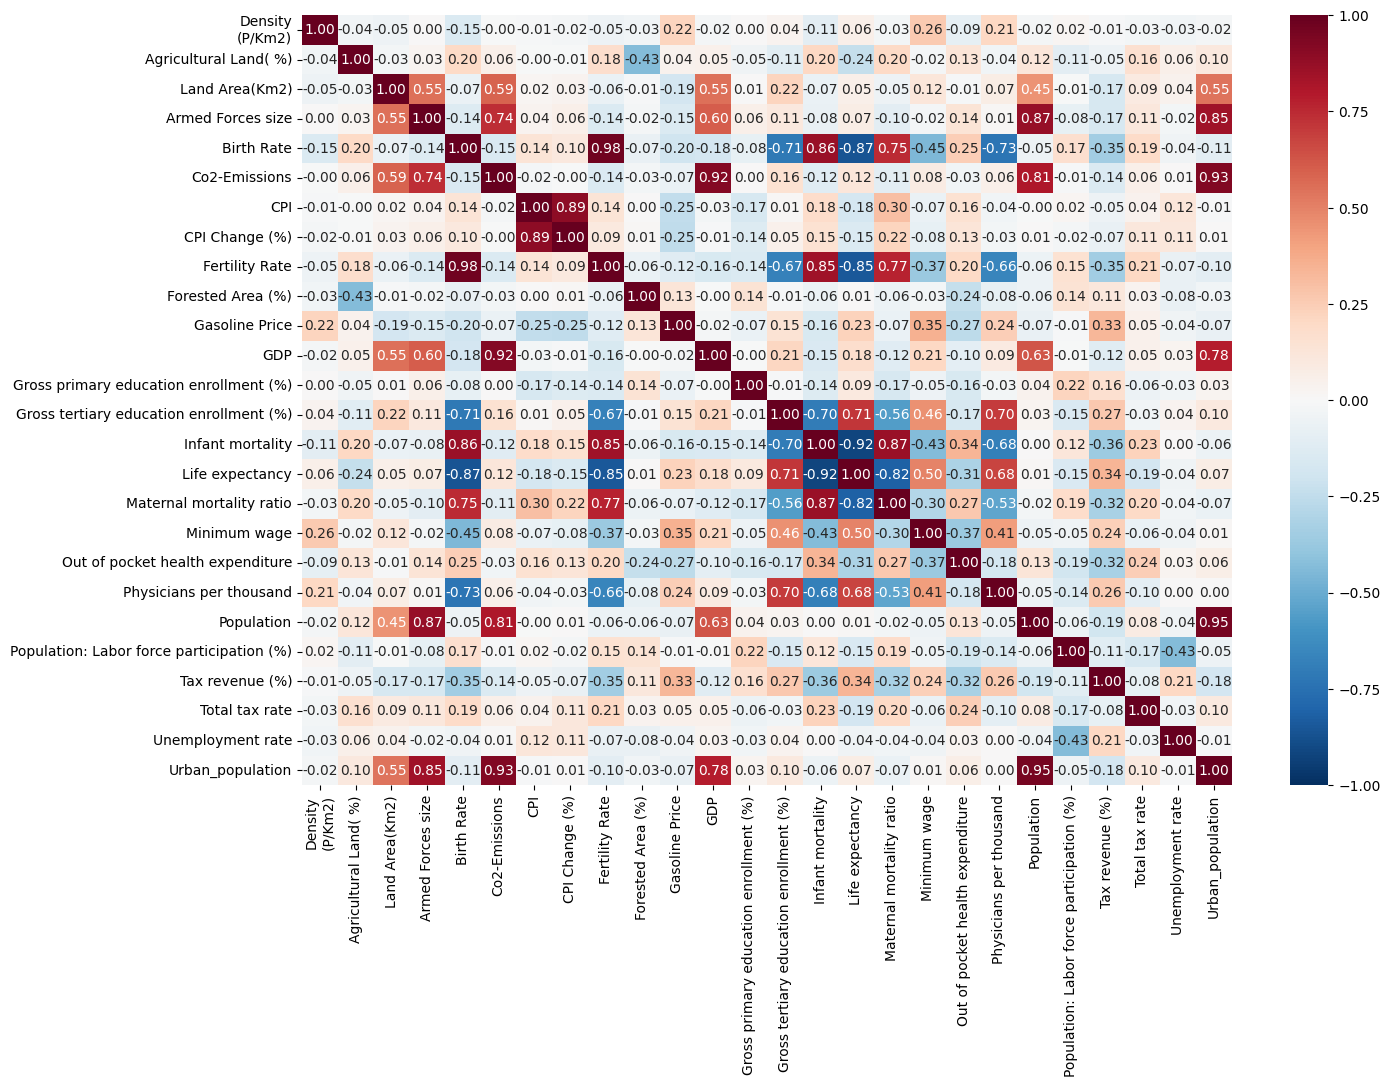

In [10]:
CorrelationMatrix = DataSet[NumericalVariables].corr()

pyplot.figure(figsize=(15,10))

mask = numpy.triu(numpy.ones_like(CorrelationMatrix, dtype=bool))

sns.heatmap(CorrelationMatrix,
            cmap='RdBu_r',
            annot=True,
            fmt='.2f',
            vmin=-1, vmax=1)

pyplot.show()

#Data Preprocessing

In [11]:
Axes = DataSet[NumericalVariables]
Scaler = MinMaxScaler()
Axes = Scaler.fit_transform(Axes)
Axes = pandas.DataFrame(Axes, columns=[NumericalVariables])
Axes.sample(10)

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
96,0.001937,0.334146,0.006513,0.000660,0.675460,0.000139,0.027672,0.107639,0.563238,0.438454,0.400,0.000141,0.518052,0.081738,0.626955,0.334356,0.574042,0.011782,0.238329,0.003567,0.003532,0.784836,0.346774,0.180529,0.096832,0.003017
171,0.002506,0.408537,0.008428,0.005609,0.618716,0.000536,0.011046,0.039738,0.440135,0.030519,0.355,0.000377,0.650714,0.224595,0.348977,0.555215,0.013066,0.016200,0.772727,0.200951,0.006668,0.081967,0.263441,0.280246,0.389106,0.003013
63,0.002088,0.413415,0.004076,0.008578,0.188402,0.001023,0.007711,0.035494,0.182125,0.413021,0.380,0.000826,0.631402,0.464654,0.087846,0.638037,0.020035,0.002946,0.701474,0.845422,0.002661,0.620902,0.583333,0.008979,0.509434,0.002599
100,0.009113,0.647561,0.000151,0.000660,0.109507,0.000907,0.003581,0.023148,0.065767,0.363174,0.595,0.003316,0.662469,0.135493,0.006017,0.898773,0.002613,0.960236,0.127764,0.356718,0.000461,0.436475,0.712366,0.058601,0.187611,0.000664
130,0.000532,0.048780,0.018101,0.015506,0.330762,0.006413,0.003233,0.016975,0.322091,0.000000,0.225,0.003590,0.671704,0.273932,0.101083,0.760736,0.014808,0.318115,0.076167,0.236623,0.003767,0.704918,0.067204,0.091682,0.091848,0.005036
144,0.019860,0.887805,0.001540,0.011547,0.642111,0.000112,0.011608,0.029707,0.516020,0.200407,0.585,0.000470,0.920235,0.043446,0.308063,0.487730,0.214286,0.160835,0.316953,0.014269,0.009033,0.936475,0.384409,0.119093,0.033464,0.002587
170,0.003531,0.917073,0.010830,0.078852,0.442758,0.002913,0.009849,0.158179,0.308600,0.027467,0.415,0.001883,0.489505,0.289396,0.151625,0.582822,0.025261,0.074374,0.657248,0.143876,0.012212,0.125000,0.381720,0.163989,0.294767,0.011095
94,0.025252,0.776829,0.000608,0.026394,0.289945,0.002505,0.006910,0.028164,0.187184,0.136317,0.370,0.002488,0.602015,0.187776,0.060168,0.800613,0.023519,0.157585,0.391892,0.248514,0.004904,0.184426,0.411290,0.114367,0.218583,0.007212
121,0.007632,0.342683,0.008608,0.036952,0.348183,0.000919,0.020001,0.038194,0.158516,0.258393,0.455,0.001428,0.996641,0.085420,0.304452,0.542945,0.160279,0.025773,0.739558,0.087990,0.020468,0.938525,0.556452,0.159735,0.046992,0.006833
180,0.000418,0.870732,0.028547,0.013857,0.446242,0.007138,0.020387,0.042524,0.305228,0.089522,0.145,0.001900,0.545760,0.053019,0.456077,0.469325,0.004355,0.064065,0.871007,0.262782,0.004251,0.543033,0.445537,0.155115,0.135991,0.003663


#The Elbow Method

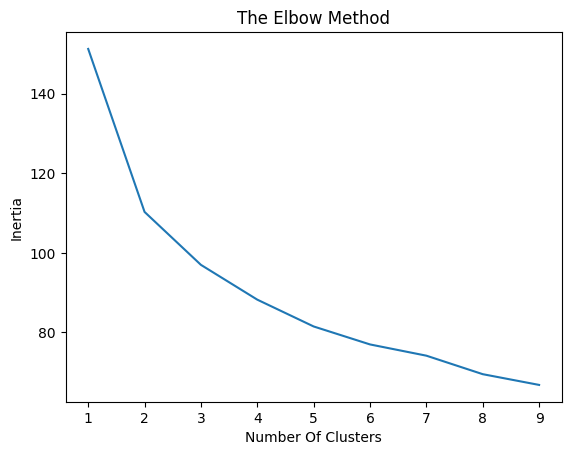

In [12]:
InertiaList = []
NumberOfClustersRange = range(1, 10)

for i in range(1, 10):
    clusteringModel = KMeans(n_clusters=i)
    clusteringModel.fit(Axes)
    InertiaList.append(clusteringModel.inertia_)

pyplot.plot(range(1, 10), InertiaList)
pyplot.xlabel('Number Of Clusters')
pyplot.ylabel('Inertia')
pyplot.title('The Elbow Method')
pyplot.show()

#Clustering

In [13]:
KMeansClustering = KMeans(n_clusters=4)

KMeansClustering.fit(Axes)

ClusterAssignments = pandas.DataFrame({'Country': DataSet.Country, 'Cluster': KMeansClustering.labels_})

fig = px.choropleth(ClusterAssignments,
                    locations='Country',
                    locationmode='country names',
                    color='Cluster',
                    hover_name='Country',                    
                    title = 'Clusters',
                    color_continuous_scale='YlGnBu',
                    width=1000,
                    height=600
                    )
fig.show()